In [1]:
import networkx as nx
from skymap import SkyMap, SkyMapMetrics
import matplotlib.pyplot as plt
import random
import warnings

warnings.filterwarnings("ignore")
random.seed(123)

COLORS = {
    0: 'blue',
    1: 'green',
    2: 'orange',
}

def draw_graph(graph: nx.Graph):
    color_map = [COLORS[node_class] for node_class in nx.get_node_attributes(graph, name="y").values()]    
    nx.draw_kamada_kawai(graph, node_color=color_map, with_labels=False)
    plt.show()

# Using SkyMap

There are two main ways to use SkyMap to generate graphs:
- Mimicking another graph
- Providing metrics

## Mimicking a graph

SkyNet can be used to generate graphs that immitate an original graph. In this example, we will use the following simple graph:

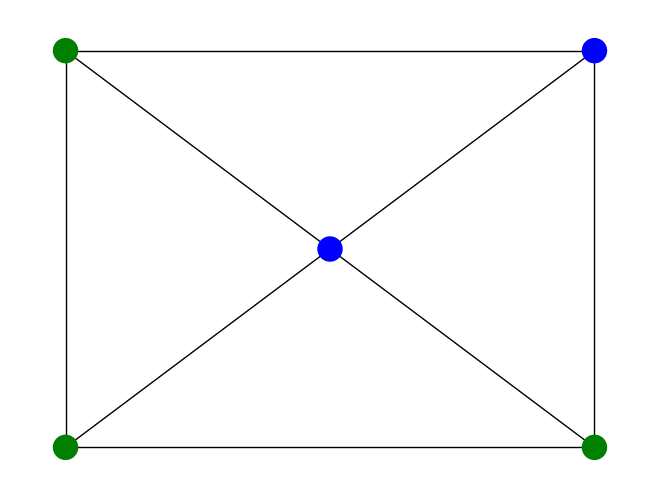

In [2]:
graph = nx.wheel_graph(5)
nodes = [0, 1, 2, 3, 4]
classes = [0, 0, 1, 1, 1]
features = [
    [0, 0, 1, 0],
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [0, 1, 1, 0],
    [1, 0, 0, 1]
]
nx.set_node_attributes(graph, dict(zip(nodes, classes)), "y")
nx.set_node_attributes(graph, dict(zip(nodes, features)), "x")

draw_graph(graph)

In [3]:
SkyMapMetrics.from_graph(graph)

SkyMapMetrics(num_nodes=5, density=0.8, num_classes=2, class_imbalance_ratio=0.19999999999999996, log_logistic_delta=100.13275854905265, log_logistic_lambda=4.931254536774754, dist_x_mean=0.0, dist_y_mean=0.0, dist_affinity_mean=1.0, self_affinity_imbalance_ratio=0.390000000000001, interclass_affinity_imbalance_ratio=0, homophily=0.375, num_features=4, zero_gen_means_mean=0.6666666666666667, zero_gen_means_var=0.0069444444444444415, zero_gen_vars_mean=0.10416666666666667, zero_gen_vars_var=0.006944444444444445, perc_edges_conc_mean=0.0, perc_edges_conc_var=0.0, perc_nodes_conc_mean=0.0, perc_nodes_conc_var=0.0, deg_mult_mean=0.44206868620901557, deg_mult_var=0.004575276673434929)

To generate the new graphs, one should use the `mimic_graph` method

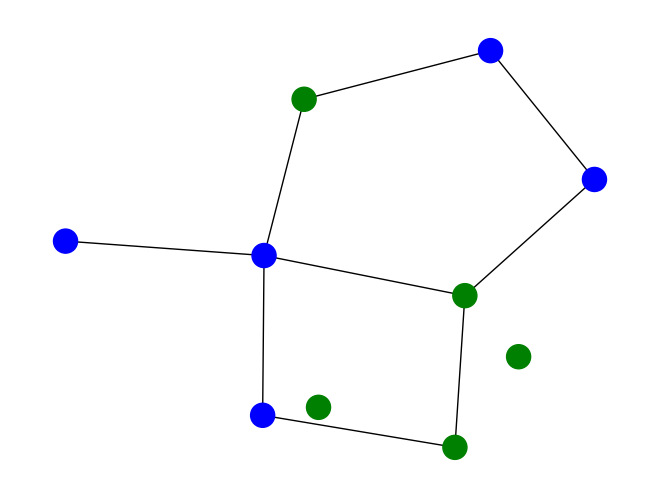

In [4]:
skymap = SkyMap()
gen_graph = skymap.mimic_graph(graph)
draw_graph(gen_graph)

Note that the number of nodes of the output graph can be tweaked

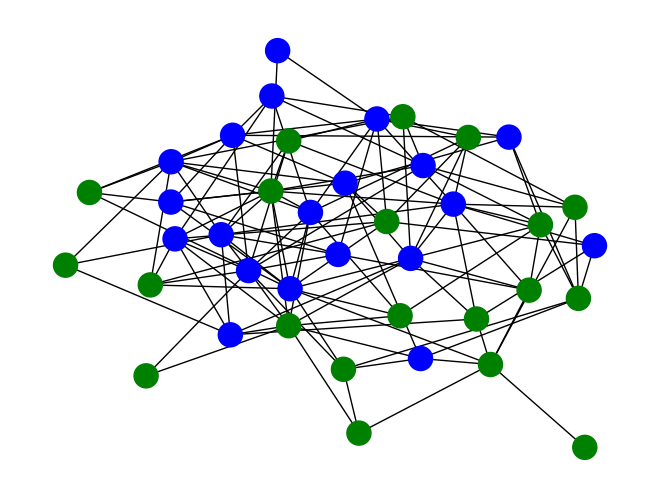

In [5]:
gen_graph_2 = skymap.mimic_graph(graph, num_nodes=20)
draw_graph(gen_graph_2)

## Generating graph from metrics

To generate a graph, first we need to define the desired output metrics.

In [6]:
metrics = SkyMapMetrics(
    num_nodes=50,
    num_classes=3,
    density=0.2,
    class_imbalance_ratio=0.5,
    log_logistic_delta=0.1,
    log_logistic_lambda=0.2,
    dist_x_mean=0.2,
    dist_y_mean=0.2,
    dist_affinity_mean=0.3,
    self_affinity_imbalance_ratio=0.4,
    interclass_affinity_imbalance_ratio=0.1,
    homophily=0.7,
    num_features=20,
    zero_gen_means_mean=0.5,
    zero_gen_means_var=0.3,
    zero_gen_vars_mean=0.2,
    zero_gen_vars_var=0.4,
    perc_edges_conc_mean=0.1,
    perc_edges_conc_var=0.005, 
    perc_nodes_conc_mean=0.5, 
    perc_nodes_conc_var=0.005,
    deg_mult_mean=0.5,
    deg_mult_var=0.05
)

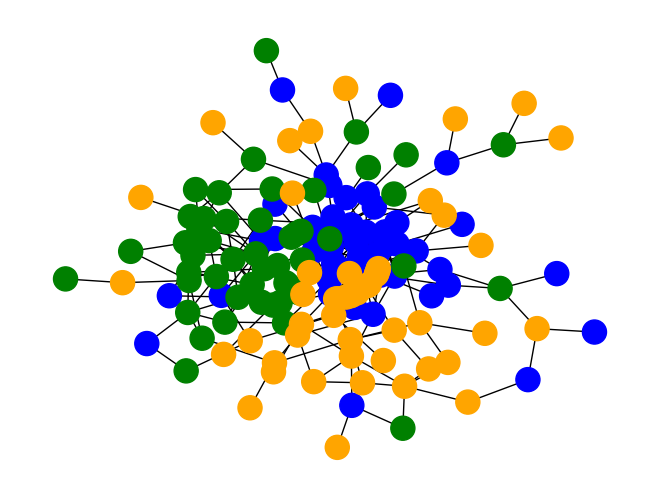

In [7]:
skynet = SkyMap()
graph_gen_3 = skynet.generate_graph(metrics)
draw_graph(graph_gen_3)